In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline # % is a magic command 

UsageError: unrecognized arguments: # % is a magic command


In [2]:
try_1 = pd.read_csv('/Users/rociobecerra/Desktop/bootcamp/new_project123.csv',parse_dates=True)
try_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20833 entries, 0 to 20832
Data columns (total 7 columns):
Company           20833 non-null object
Overall Rating    20833 non-null int64
Rating            20796 non-null object
Title             20830 non-null object
Position          20833 non-null object
Location          20833 non-null object
Date              20833 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [3]:
#rename columns
try_1.columns = ['company', 'rating','review_title','position','location','date','overall_rating']
try_1.head()

,company,rating,review_title,position,location,date,overall_rating
0,Adobe,5,One of the best places to work!,Solutions Consultant,"Remote, CA",19-Jul-19,4.3
1,Adobe,5,Great place to work and have life,SDE,"San Francisco, CA",16-Jul-19,4.3
2,Adobe,4,Planning could improve,Senior Business Change Manager,"San Jose, CA",5-Jul-19,4.3
3,Adobe,5,A great work place,Globalization Engineer,"Seattle, WA",21-Jun-19,4.3
4,Adobe,5,Great benefits and smart people,SR. PROGRAM MANAGER,"San Jose, CA",18-Jun-19,4.3


In [4]:
try_1['rating'] = try_1['rating'].astype('float')

In [5]:
#remove 11th company from dataframe, only need top 10
indeed_work = try_1[try_1['company'] != 'Bristol-Myers Squibb']

In [6]:
#remove missing values
positions_indeed = indeed_work.dropna()
positions_indeed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19719 entries, 0 to 19755
Data columns (total 7 columns):
company           19719 non-null object
rating            19719 non-null float64
review_title      19719 non-null object
position          19719 non-null object
location          19719 non-null object
date              19719 non-null object
overall_rating    19719 non-null float64
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


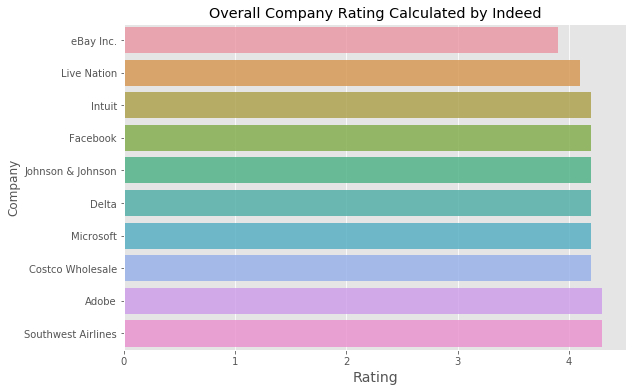

In [7]:
#Barplot
plt.figure(figsize=(9,6))
df_2 = positions_indeed.groupby(['company']).mean()[['overall_rating']].sort_values('overall_rating')
df_2.reset_index(inplace=True)

sns.barplot(x='overall_rating', y='company', data=df_2, alpha=.8)
plt.title('Overall Company Rating Calculated by Indeed')
plt.ylabel('Company', fontsize=12)
plt.xlabel('Rating', fontsize=14)
plt.show()

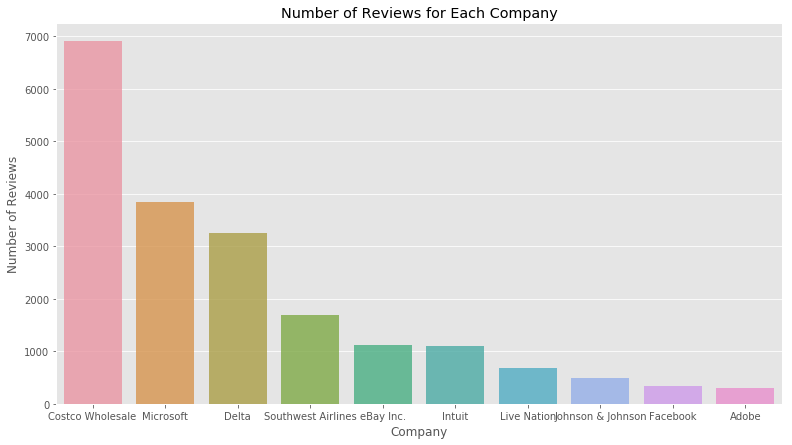

In [8]:
#barplot 
city_count  = positions_indeed['company'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(13,7))
sns.barplot(city_count.index, city_count.values, alpha=.8)
plt.title('Number of Reviews for Each Company')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.show()

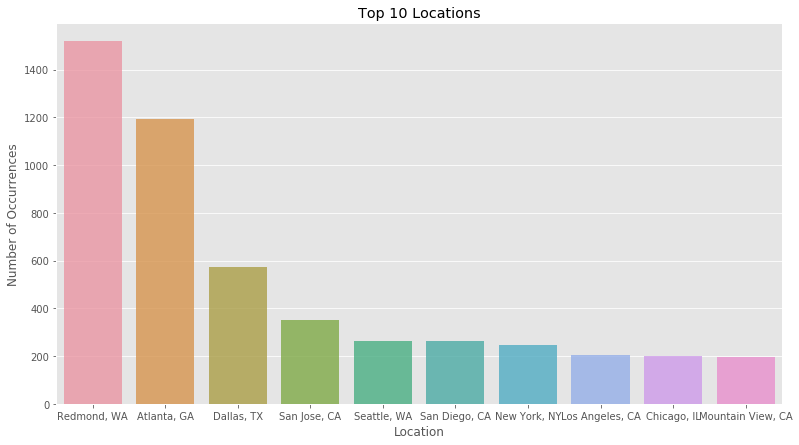

In [9]:
#barplot
city_count  = positions_indeed['location'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(13,7))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 10 Locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.show()

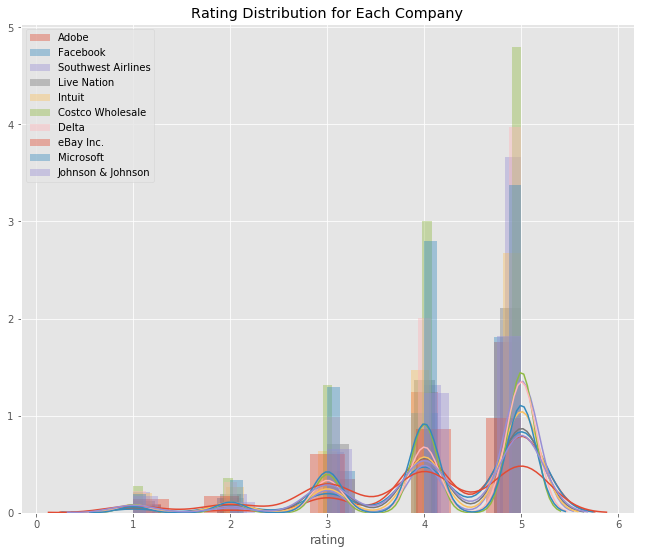

In [10]:
#distribution plot
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(positions_indeed[positions_indeed.company == 'Adobe'].rating, ax=ax, label='Adobe')
sns.distplot(positions_indeed[positions_indeed.company == 'Facebook'].rating, ax=ax, label='Facebook')
sns.distplot(positions_indeed[positions_indeed.company == 'Southwest Airlines'].rating, ax=ax, label='Southwest Airlines')
sns.distplot(positions_indeed[positions_indeed.company == 'Live Nation'].rating, ax=ax, label='Live Nation')
sns.distplot(positions_indeed[positions_indeed.company == 'Intuit'].rating, ax=ax, label='Intuit')
sns.distplot(positions_indeed[positions_indeed.company == 'Costco Wholesale'].rating, ax=ax, label='Costco Wholesale')
sns.distplot(positions_indeed[positions_indeed.company == 'Delta'].rating, ax=ax, label='Delta')
sns.distplot(positions_indeed[positions_indeed.company == 'eBay Inc.'].rating, ax=ax, label='eBay Inc.')
sns.distplot(positions_indeed[positions_indeed.company == 'Microsoft'].rating, ax=ax, label='Microsoft')
sns.distplot(positions_indeed[positions_indeed.company == 'Johnson & Johnson'].rating, ax=ax, label='Johnson & Johnson')
plt.title('Rating Distribution for Each Company')
plt.legend()

Text(0.5, 1.0, 'Boxplot Rating for Each Company Including the Mean')

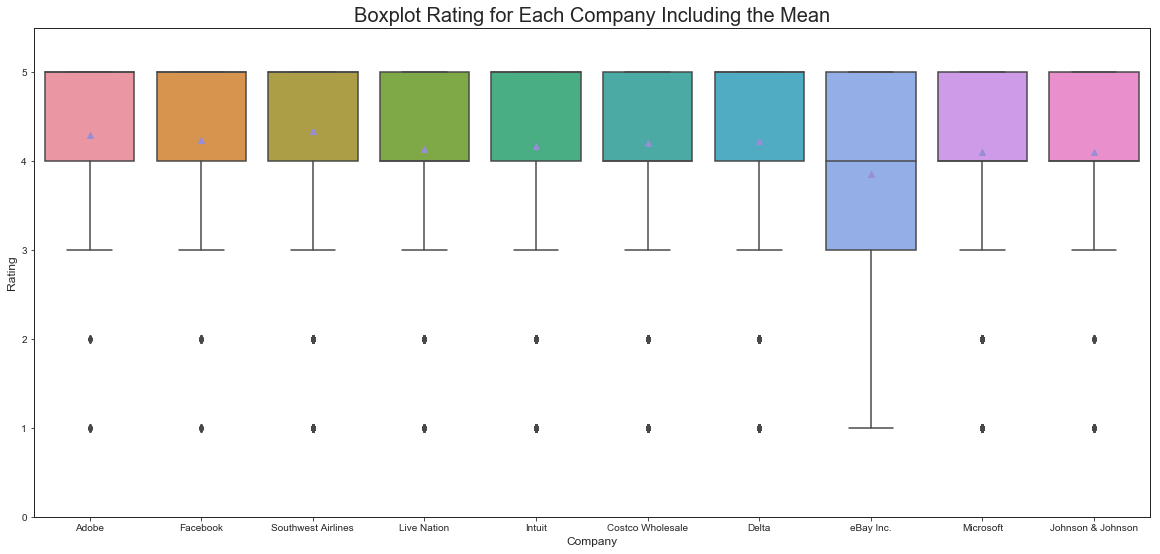

In [11]:
#boxplot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 9)
plt.ylim(0, 5.5)
plt.title('Boxplot Rating for Each Company', fontsize=20)
sns.boxplot(x='company', y='rating', data=positions_indeed, showmeans=True)
plt.xlabel('Company')
plt.ylabel('Rating')
plt.title('Boxplot Rating for Each Company Including the Mean', fontsize=20)

In [12]:
#Preprocessing for WORD CLOUD 
import re

# Convert all the string to lower cases
positions_indeed['position'] = positions_indeed['position'].str.lower()  #could lose tone and meaning 
# \S+ means anything that is not an empty space
positions_indeed['position'] = positions_indeed['position'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
positions_indeed['position'] = positions_indeed['position'].apply(lambda x: re.sub('\s+', ' ', x))

/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [13]:
#REMOVE PUNCtuation
positions_indeed['position'] = positions_indeed['position'].apply(lambda x: re.sub('[^\w\s]', '', x))

/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
positions_indeed['position'] = positions_indeed['position'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/Users/rociobecerra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
from wordcloud import WordCloud

In [17]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(positions_indeed['position']))

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

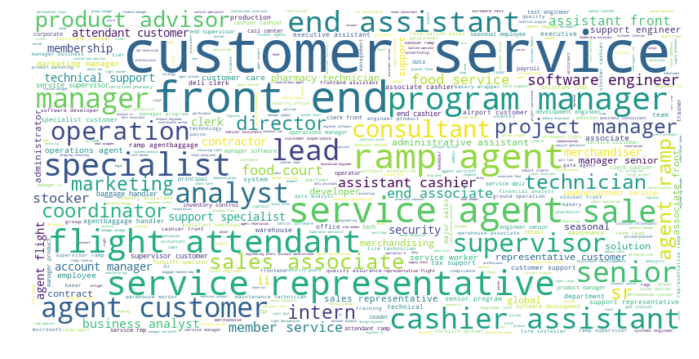

In [19]:
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()